<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula10d_aprendizado_n%C3%A3o_supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array([[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8],
                         [-2.8, 2.8], [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, init="random", n_init="auto", random_state=42)
y_pred = kmeans.fit_predict(X)


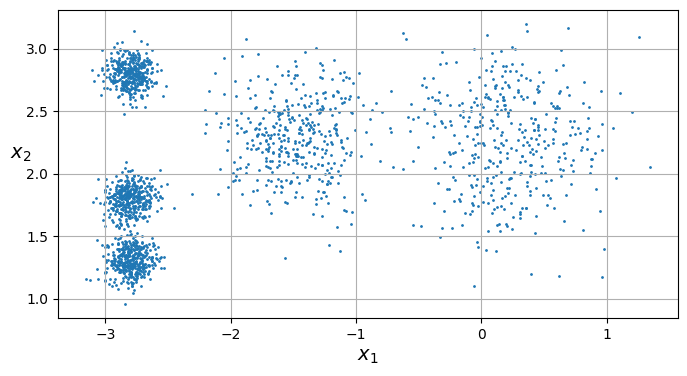

In [11]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.grid()
plt.show()

In [12]:
y_pred

array([2, 2, 4, ..., 1, 4, 2], dtype=int32)

In [13]:
y_pred is kmeans.labels_

True

In [19]:
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-2.80037642,  1.30082566],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063]])

In [15]:
blob_centers

array([[ 0.2,  2.3],
       [-1.5,  2.3],
       [-2.8,  1.8],
       [-2.8,  2.8],
       [-2.8,  1.3]])

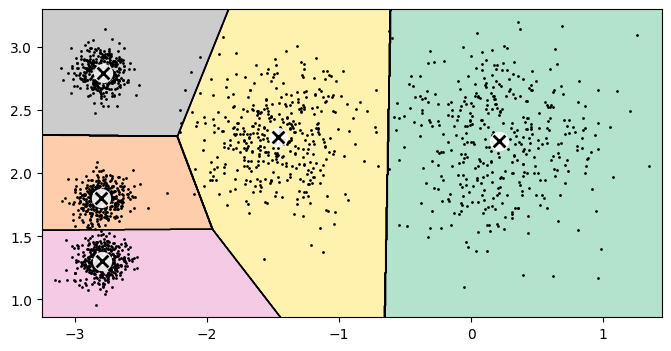

In [20]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='o', s=35, linewidths=8,
               color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='x', s=2, linewidths=12,
               color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

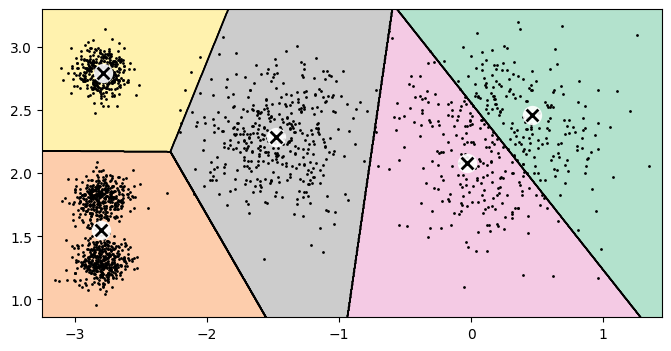

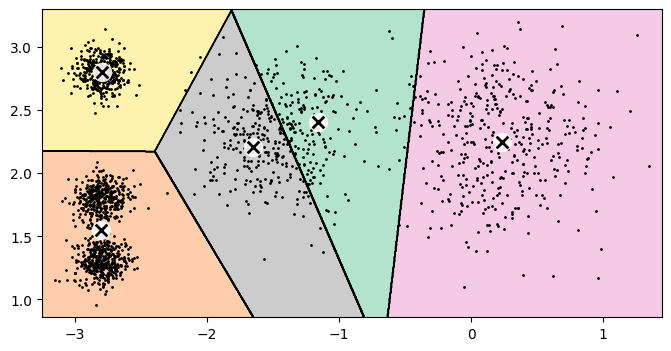

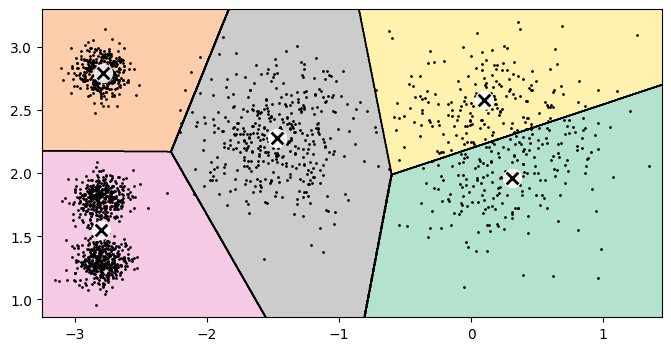

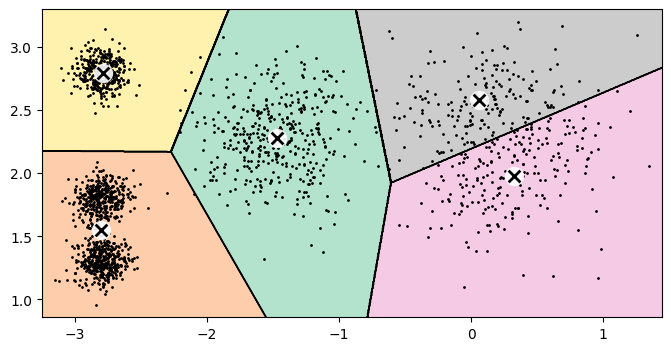

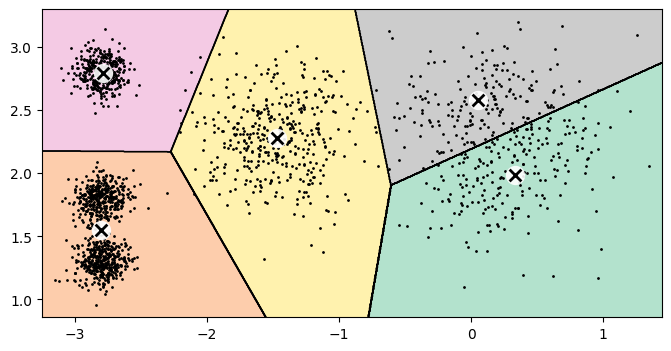

In [21]:
for _ in range(5):
  plt.figure(figsize=(8, 4))
  plot_decision_boundaries(KMeans(n_clusters=k, init="k-means++", n_init="auto").fit(X),
                           X)
  plt.show()

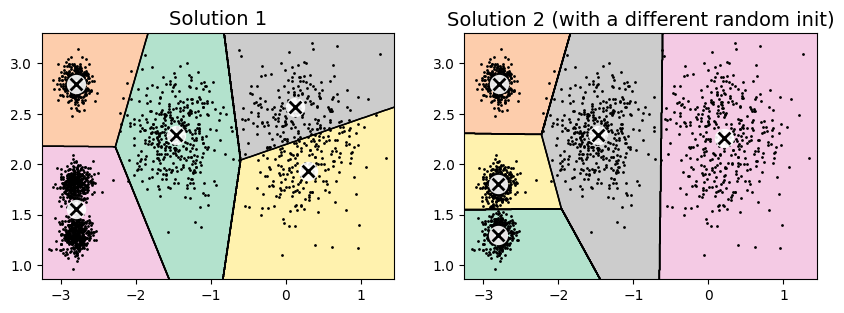

In [22]:
def plot_cluster_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)
    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)
    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X)
    if title2:
        plt.title(title2, fontsize=14)

kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1, random_state=9)
plot_cluster_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                        "Solution 1", "Solution 2 (with a different random init)")
plt.show()

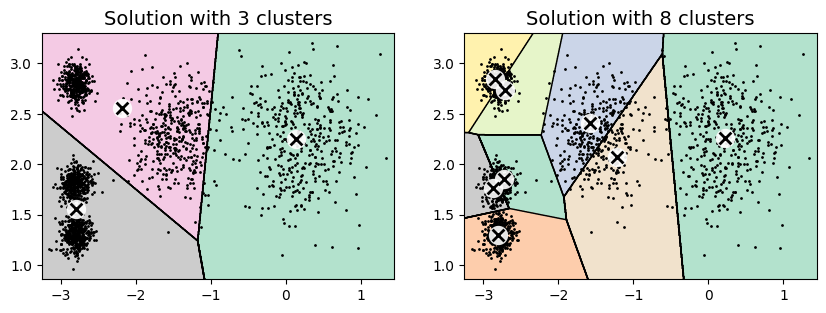

In [23]:
kmeans_k3 = KMeans(n_clusters=3, init="random", n_init=1, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, init="random", n_init=1, random_state=42)

plot_cluster_comparison(kmeans_k3, kmeans_k8, X,
                        "Solution with 3 clusters", "Solution with 8 clusters")
plt.show()

In [24]:
kmeans_k3.inertia_

653.2167190021554

In [25]:
kmeans_k8.inertia_

184.1645290381101

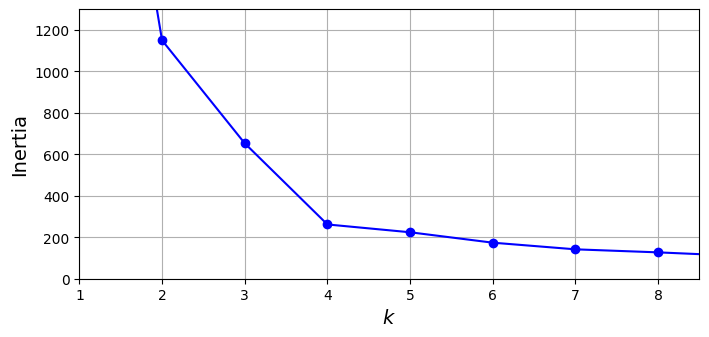

In [26]:
kmeans_per_k = [KMeans(n_clusters=k, n_init='auto', random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 8.5, 0, 1300])
plt.grid()
plt.show()

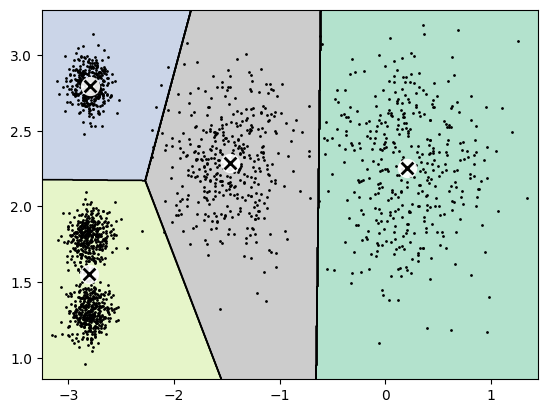

In [27]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

In [28]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

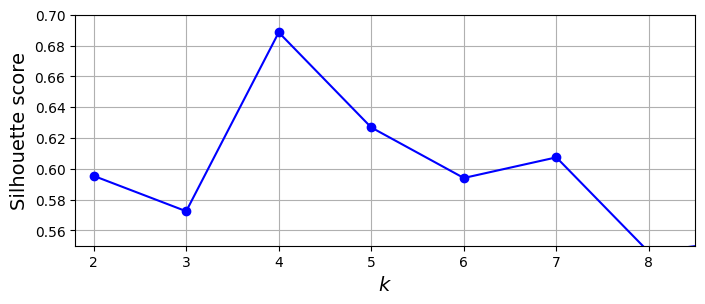

In [29]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()
plt.show()

## Aprendizado semi-supervisionado

In [30]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = X_digits[:1400], X_digits[1400:], y_digits[:1400], y_digits[1400:]

In [33]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(solver="liblinear", max_iter=5000, random_state=42)
log_reg.fit(X_train[:50], y_train[:50])

LogisticRegression(max_iter=5000, random_state=42, solver='liblinear')

In [34]:
log_reg.score(X_test, y_test)

0.7657430730478589

In [35]:
log_reg_full = LogisticRegression(solver="liblinear", max_iter=5000, random_state=42)
log_reg_full.fit(X_train, y_train)
log_reg_full.score(X_test, y_test)

0.9017632241813602

In [37]:
k = 50
kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

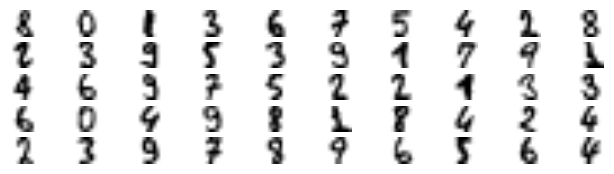

In [38]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')
plt.show()

In [39]:
y_representative_digits = np.array([
    8, 0, 1, 3, 6, 7, 5, 4, 2, 8,
    2, 3, 9, 5, 3, 9, 1, 7, 9, 1,
    4, 6, 9, 7, 5, 2, 2, 1, 3, 3,
    6, 0, 4, 9, 8, 1, 8, 4, 2, 4,
    2, 3, 9, 7, 8, 9, 6, 5, 6, 4
])

In [40]:
log_reg = LogisticRegression(solver="liblinear", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8337531486146096

In [42]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [43]:
log_reg = LogisticRegression(solver="liblinear", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8690176322418136

In [83]:
from functools import partial
percentile_closest = 80
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]
print(len(X_train_partially_propagated),
 (y_train_partially_propagated == y_train[partially_propagated]).mean())
log_reg = LogisticRegression(solver="liblinear", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

1111 0.9774977497749775


0.8790931989924433

In [84]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train_partially_propagated, y_train_partially_propagated)
score = clf.score(X_test, y_test)
print(score)

0.947103274559194


In [85]:
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.9672544080604534


In [86]:
clf.fit(X_representative_digits, y_representative_digits)
score = clf.score(X_test, y_test)
print(score)

0.7858942065491183
